# Approach 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import seaborn as sns; sns.set()
from sklearn.neighbors.kde import KernelDensity
from sklearn.model_selection import GridSearchCV
from scipy.stats import pearsonr
import calendar

working_dir = os.getcwd()

In [2]:
all_data = pd.read_csv(working_dir+"/data/day_data.csv", header=0, index_col=0, parse_dates=[0])

## Plotting (5-min)
#### 1. Histgram of every month and construct 12 new columns indicating outlier (3 * std) based on monthly distribution
#### 2. Histgram based on (Closing Price - Opening Price)
#### 3. Histgram based on (High Price - Low Price)/Low Price

Skewness: 
[2.253399792169561, 3.30196953700842, 0.3625755844635479, 0.17719672367479558, 2.847316010450491, -0.007879239281719491, 0.9462864263063635, 5.288384055742461, -0.8650560247777552, 1.9158223275397404, 4.08184961636388, 1.930919389846633]
Kurtosis: 
[66.75088297918857, 64.82445624331837, 55.71696090396347, 54.81222275130607, 63.163301332743856, 52.41803903649912, 45.59702295378819, 165.34380827634848, 30.95156609621674, 39.15398254450393, 111.93564912120887, 32.207768948971015]


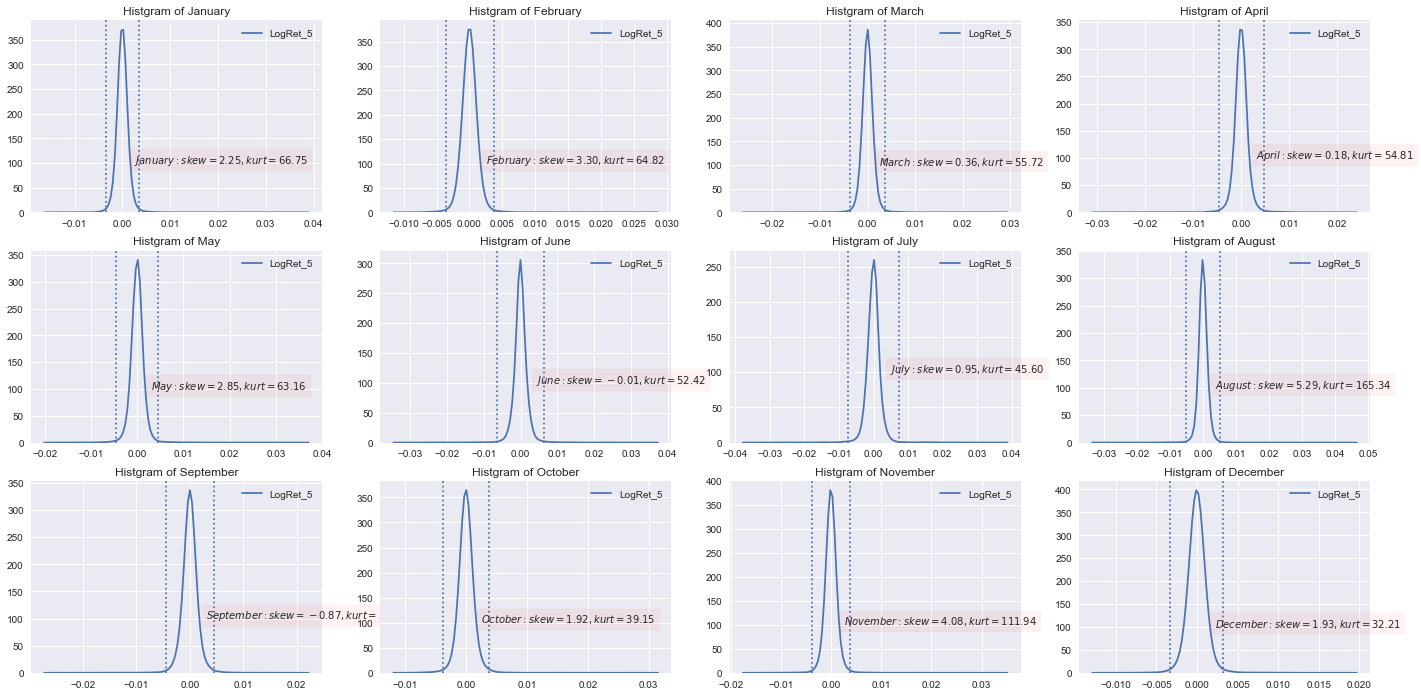

In [3]:
skew_list=[]
kurt_list=[]
plt.figure(figsize=(24,12))
for i in range(1,13):
    x=all_data.loc[all_data.index.month==i]
    x=x.dropna(axis=0)
    skew=x["LogRet_5"].skew()
    kurt=x["LogRet_5"].kurt()
    mean=x["LogRet_5"].mean()
    std=x["LogRet_5"].std()
    max_x=x["LogRet_5"].max()
    #print ("Skewness of Month_"+str(i))
    #print (x.skew())
    skew_list.append(skew)
    #print ("Kurtosis of Month_"+str(i))
    #print (x.kurt())
    kurt_list.append(kurt)
    plt.subplot(3,4,i)
    sns.kdeplot(x["LogRet_5"],shade=False,bw=0.0006)
    info = r'$%s:skew=%.2f,kurt=%.2f$' %(calendar.month_name[i],skew,kurt)
    plt.text(mean+2*std,100,info,fontsize=10,bbox=dict(facecolor='red',alpha=0.05))
    plt.legend(loc='upper right', fontsize=10)
    plt.axvline(mean+3*std,ls=":")
    plt.axvline(mean-3*std,ls=":")
    plt.title("Histgram of "+calendar.month_name[i])
    
    # Construct new columns in the dataframe
    all_data["Month_"+str(i)+"_Flag"] = all_data["LogRet_5"].apply(lambda x: 1 if x > mean+3*std or x < mean-3*std else 0)

print ('Skewness: ')
print (skew_list)
print ('Kurtosis: ')
print (kurt_list)
plt.savefig("Hist for Every Month")

Skewness: 
[1.9201462975684656, 2.8484963273085113, 0.6043000850250925, -0.22175848390930714, 2.4287032440494176, -0.2647020909135842, 0.9061287003168508, 4.8481704873450315, -0.986539197952095, 1.9483580466137826, 3.0477107929050957, 1.65888264400977]
Kurtosis: 
[48.543414807192846, 53.84201625605332, 48.23641737638975, 44.6645211551964, 48.188985631518015, 41.274871784794485, 37.96907429644448, 153.59157700524835, 31.180519170905303, 37.2357590702718, 81.52456499059629, 26.808996214563756]


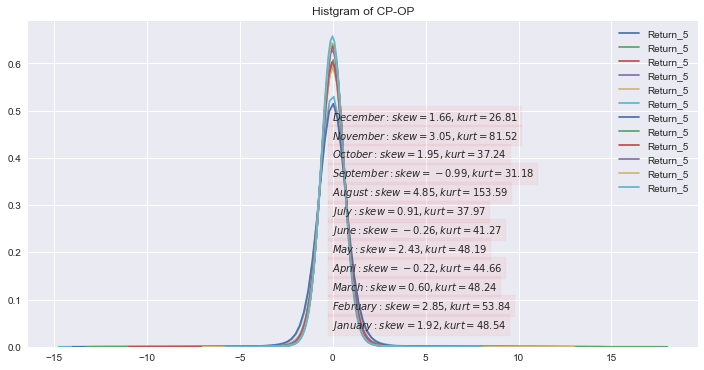

In [4]:
skew_list=[]
kurt_list=[]
plt.figure(figsize=(12,6))
for i in range(1,13):
    x=all_data.loc[all_data.index.month==i]
    x=x.dropna(axis=0)
    skew=x["Return_5"].skew()
    kurt=x["Return_5"].kurt()
    mean=x["Return_5"].mean()
    std=x["Return_5"].std()
    max_x=x["Return_5"].max()
    #print ("Skewness of Month_"+str(i))
    #print (x.skew())
    skew_list.append(skew)
    #print ("Kurtosis of Month_"+str(i))
    #print (x.kurt())
    kurt_list.append(kurt)
    sns.kdeplot(x["Return_5"],shade=False,bw=0.5)
    info = r'$%s:skew=%.2f,kurt=%.2f$' %(calendar.month_name[i],skew,kurt)
    plt.text(-0.04,i/25,info,bbox=dict(facecolor='red',alpha=0.05))
print ('Skewness: ')
print (skew_list)
print ('Kurtosis: ')
print (kurt_list)
plt.title("Histgram of CP-OP")
plt.savefig("Hist of CP-OP")

Skewness: 
[10.96395240766311, 2.287438596107004, 14.455687113663725, 3.83472849160022, 12.127239587091424, 5.422275853708792, 5.216086821743424, 8.12902595881157, 7.156072748971871, 9.110950295849415, 4.191419738577176, 2.9420493228507807]
Kurtosis: 
[376.20151224032287, 16.292576279284923, 497.97807197709176, 41.66006036923493, 528.1555131435804, 77.17585231609846, 94.47283824657862, 278.8155635551754, 176.8790533061579, 326.8881592382713, 57.52189438547489, 25.07688509978667]


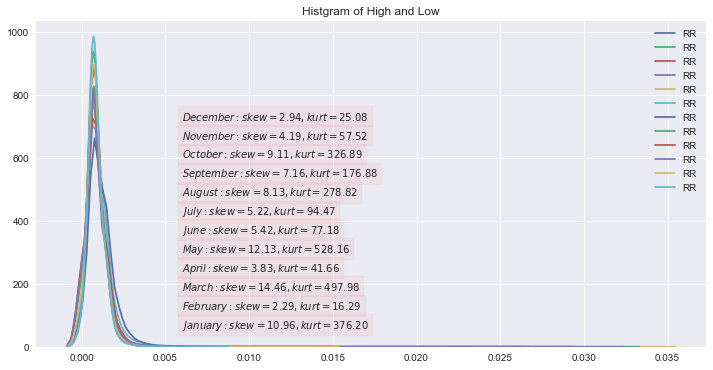

In [5]:
skew_list=[]
kurt_list=[]
plt.figure(figsize=(12,6))
for i in range(1,13):
    x=all_data.loc[all_data.index.month==i]
    x=x.dropna(axis=0)
    skew=x["RR"].skew()
    kurt=x["RR"].kurt()
    mean=x["RR"].mean()
    std=x["RR"].std()
    max_x=x["RR"].max()
    #print ("Skewness of Month_"+str(i))
    #print (x.skew())
    skew_list.append(skew)
    #print ("Kurtosis of Month_"+str(i))
    #print (x.kurt())
    kurt_list.append(kurt)
    sns.kdeplot(x["RR"],shade=False,bw=0.0003)
    info = r'$%s:skew=%.2f,kurt=%.2f$' %(calendar.month_name[i],skew,kurt)
    plt.text(0.006,60*i,info,bbox=dict(facecolor='red',alpha=0.05))
print ('Skewness: ')
print (skew_list)
print ('Kurtosis: ')
print (kurt_list)
plt.title("Histgram of High and Low")
plt.savefig("Hist of High and Low")

## Rank based on Skewness and Kurtosis

In [6]:
# Skewness
skew_sort=np.argsort(skew_list)
for i in skew_sort:
    print (calendar.month_name[i+1])

February
December
April
November
July
June
September
August
October
January
May
March


In [7]:
# Kurtosis
kurt_sort=np.argsort(kurt_list)
for i in kurt_sort:
    print (calendar.month_name[i+1]) 

February
December
April
November
June
July
September
August
October
January
March
May
